In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/selected_new_article_data.csv")
data['claimed_type'] = data.type.apply(lambda x: x.split(';')[0])

data.head()

,index,sn_name,type,size_r,curve_r,spec_class,rms,rms_for_pval,is_ia,pval,...,d_11,d_12,d_13,d_14,d_15,logreg_pred,rf_pred,xgb_pred,nn,claimed_type
0,0,ASASSN-13ax,Dwarf Nova,122,"[(56477.4482, nan, 1.83738430e-06, 7.44609129e...",0,9186.448800,1.111560e+06,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.683464,0.388571,0.237813,0.823709,Dwarf Nova
1,1,ASASSN-13cu,Ia,4,"[(56531.47930288, nan, 1.90528523e-07, 2.65857...",0,2674.142946,8.022429e+03,1,0.0,...,0.774993,0.709666,0.590887,0.307630,0.000000,0.279852,0.198627,0.344758,0.054241,Ia
2,4,ASASSN-14ae,TDE,45,"[(56684.1203, nan, 3.85088013e-07, 8.24274385e...",1,433.613743,1.907900e+04,0,0.0,...,0.863747,0.957937,0.000000,0.000000,0.000000,0.248530,0.221915,0.026764,0.079206,TDE
3,6,ASASSN-14bb,Ia,8,"[(56798.8868, nan, 8.31227686e-07, 3.52170936e...",0,532.439311,3.727075e+03,1,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.909950,0.794629,0.162863,0.767512,Ia
4,7,ASASSN-14dq,II;IIb,97,"[(56850.09 , nan, 4.98884487e-07, 5.97336472e-...",0,4474.522320,4.295541e+05,0,0.0,...,0.875898,0.927148,0.919208,0.720705,0.539576,0.043674,0.009322,0.002370,0.000061,II


In [3]:
TYPES = {
    'Ia': 'Ia',
    'II': 'II',
    'SLSN-I': 'SLSN',
    'CV': 'CV',
    'II P': 'II',
    'Candidate': 'Candidate',
    'Ic': 'Ibc',
    'Ia Pec': 'Ia Pec',
    'Ib': 'Ibc',
    'IIn': 'II',
    'Ia-91T': 'Ia Pec',
    'IIb': 'II',
    'Ib/c': 'Ibc',
    'Ia-02cx': 'Ia Pec',
    'YSO': 'Other',
    'SLSN': 'SLSN',
    'QSO': 'Other',
    'AGN': 'Other',
    'Dwarf Nova': 'Other',
    'SLSN-I?': 'SLSN',
    'CV?': 'CV',
    'ULENS': 'Other',
    'Star': 'Other',
    'Ca-rich': 'Ibc',
    'Ic Pec': 'Ibc',
    'Ic BL': 'Ibc',
    'Super-Luminous Ic': 'SLSN',
    'II L': 'II',
    'Ia-91bg': 'Ia Pec',
    'TDE': 'Other',
    'II Pec': 'II',
    'Ia?': 'Ia Pec',
    'Galaxy': 'Other',
    'XRB': 'Other',
    'microlens': 'Other',
    'Ibn': 'Ibc',
    'CC': 'II',
    'Blazar': 'Other',
    'I-faint': 'Candidate',
    'LRN': 'Other',
    'SLSN-I-R': 'SLSN',
    'Ib-Ca': 'Ibc',
    'II-P/L': 'II',
    'SLSN-II': 'II',
    'Ib-Ca-rich': 'Ibc',
    'II?': 'II',
    'LBV to IIn': 'II',
    'SLSN-R': 'SLSN',
}

In [4]:
claimed_type = data.claimed_type.values
predictions = data.rf_pred.values

pred_for_types = {}
for atype, apred in zip(claimed_type, predictions):
    t = TYPES[atype]
    if t in pred_for_types:
        pred_for_types[t].append(apred)
    else:
        pred_for_types[t] = [apred]

In [5]:
pred_for_types.keys()

dict_keys(['Other', 'Ia', 'II', 'Ia Pec', 'Ibc', 'Candidate', 'SLSN', 'CV'])

In [6]:
types = ['Ia', 'Ia Pec', 'Candidate', 'Ibc', 'Other', 'CV', 'SLSN', 'II'][::-1]
types = ['Ia', 'Ia Pec', 'Ibc', 'II', 'Candidate', 'SLSN', 'CV', 'Other'][::-1]
types = ['Ia', 'Ia Pec', 'Ibc', 'II', 'SLSN', 'Candidate', 'CV', 'Other'][::-1]

lineoffsets = []
positions = []
for i, atype in enumerate(types):
    positions.append(pred_for_types[atype])
    lineoffsets.append(i)

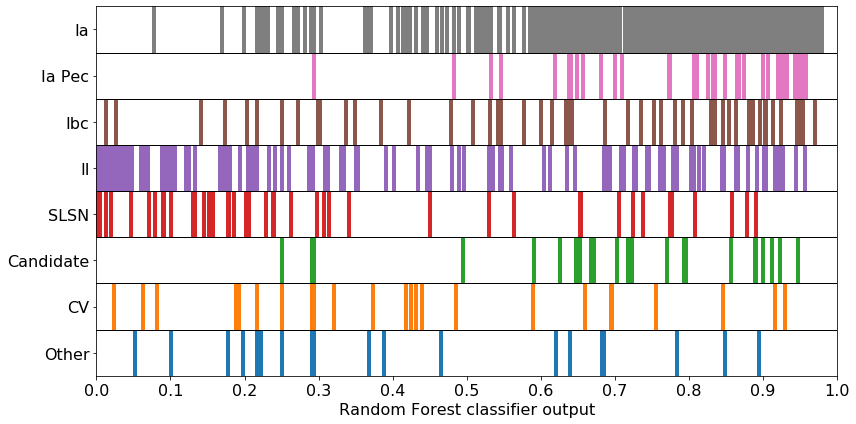

In [7]:
import matplotlib as mpl

plt.figure(figsize=(12, 6))
colors = ['C0', 'C1', 'C2', 'C3' , 'C4', 'C5', 'C6', 'C7']
plt.eventplot(positions=positions, colors=colors, lineoffsets=lineoffsets,
                    linelengths=1, linewidth=4, alpha=1)

for i in lineoffsets[:-1]:
    plt.plot([0, 1], [i+0.5, i+0.5], color='0', linewidth=1)

plt.yticks(np.arange(len(types)), types, size=16)
plt.ylim(-0.5, len(types)-0.5)
plt.xticks(np.arange(0, 1.1, 0.1), size=16)
plt.xlim(0, 1)
plt.xlabel('Random Forest classifier output', size=16)

plt.tight_layout()
plt.savefig(fname="images/pred_for_types.pdf", format='pdf')
plt.savefig(fname="images/pred_for_types.png", dpi=300, format='png')
plt.show()